In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dogs-vs-cats.zip

Archive:  /content/drive/MyDrive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [3]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [4]:
!unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
# Q1. Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

Replicating images to training, validation, and test directories

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=667, end_index=1667)
make_subset("validation", start_index=1668, end_index=2168)
make_subset("test", start_index=2169, end_index=2669)

In [ ]:
#Picture reading with "image_dataset_from_directory"

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

training_data = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
valid_data = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
testing_data= image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


preprocessing of data


Created a dataset instance with 1000 random samples and a vector size of 16 for each sample, using a NumPy array

In [7]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
#Creating the model

#Building a small network to separate dogs from cats

In [11]:
for data_batch, labels_batch in training_data:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Building a few convolution for dogs vs. cats

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

in10 = keras.Input(shape=(180, 180, 3))
mad = layers.Rescaling(1./255)(in10)
mad = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(mad)
mad = layers.MaxPooling2D(pool_size=2)(mad)
mad = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(mad)
mad = layers.MaxPooling2D(pool_size=2)(mad)
mad = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(mad)
mad = layers.MaxPooling2D(pool_size=2)(mad)
mad = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(mad)
mad = layers.MaxPooling2D(pool_size=2)(mad)
mad = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(mad)
mad = layers.Flatten()(mad)
mad = layers.Dropout(0.5)(mad)
output10 = layers.Dense(1, activation="sigmoid")(mad)
mode10 = keras.Model(inputs=in10, outputs=output10)

Giving the model for training

In [13]:
mode10.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# The training dataset is used to train the model after it has been built. We use the validation dataset to verify the model's performance at the end of each epoch. I'm utilizing GPU to reduce the time it takes for each epoch to execute.


In [14]:
mode10.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
#Model fitting is done using the dataset.

In [15]:
callbac10 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history10 = mode10.fit(
    training_data,
    epochs=100,
    validation_data=valid_data,
    callbacks=callbac10)

Epoch 1/100
63/63 [==============================] - 8s 33ms/step - loss: 0.6958 - accuracy: 0.5100 - val_loss: 0.6927 - val_accuracy: 0.5150
Epoch 2/100
63/63 [==============================] - 2s 23ms/step - loss: 0.6934 - accuracy: 0.5220 - val_loss: 0.6818 - val_accuracy: 0.5520
Epoch 3/100
63/63 [==============================] - 1s 21ms/step - loss: 0.6846 - accuracy: 0.5825 - val_loss: 0.6929 - val_accuracy: 0.5310
Epoch 4/100
63/63 [==============================] - 1s 22ms/step - loss: 0.6701 - accuracy: 0.5905 - val_loss: 0.6674 - val_accuracy: 0.6290
Epoch 5/100
63/63 [==============================] - 2s 23ms/step - loss: 0.6342 - accuracy: 0.6480 - val_loss: 0.6204 - val_accuracy: 0.6540
Epoch 6/100
63/63 [==============================] - 1s 23ms/step - loss: 0.6216 - accuracy: 0.6570 - val_loss: 0.6198 - val_accuracy: 0.6670
Epoch 7/100
63/63 [==============================] - 2s 23ms/step - loss: 0.5870 - accuracy: 0.7070 - val_loss: 0.5980 - val_accuracy: 0.6900
Epoch 

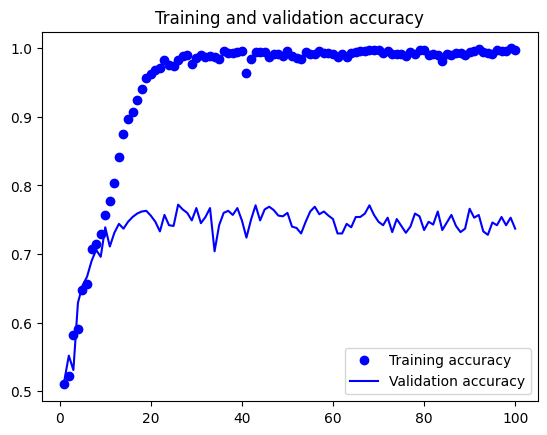

<Figure size 640x480 with 0 Axes>

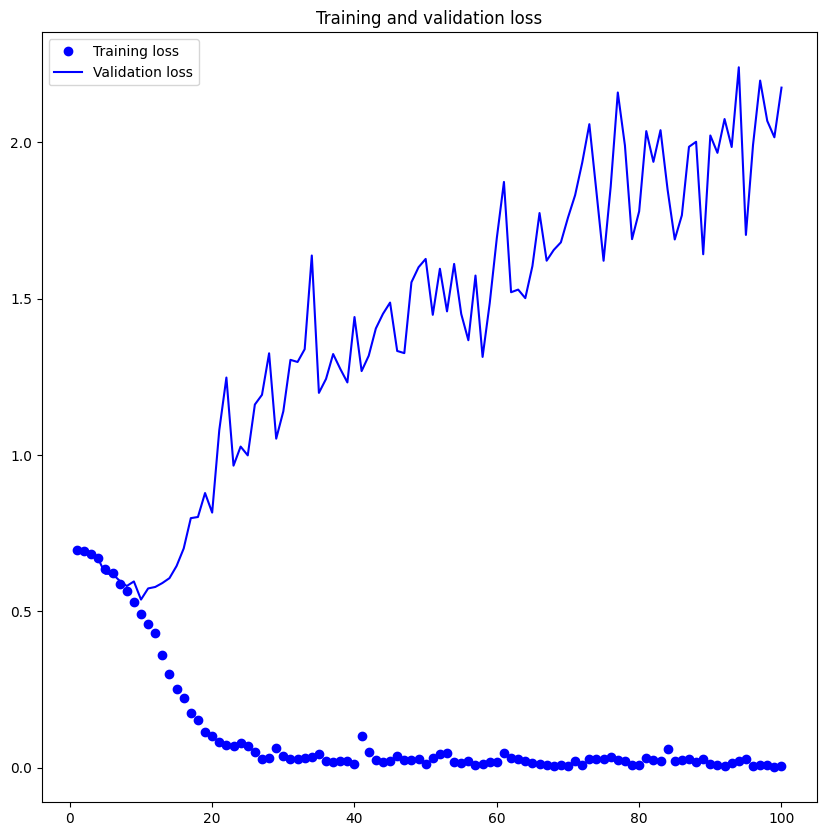

In [16]:
import matplotlib.pyplot as plt
accur10 = history10.history["accuracy"]
val_accur10 = history10.history["val_accuracy"]
loss10 = history10.history["loss"]
val_loss10 = history10.history["val_loss"]
epochs = range(1, len(accur10) + 1)
plt.plot(epochs, accur10, "bo", label="Training accuracy")
plt.plot(epochs, val_accur10, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss10, "bo", label="Training loss")
plt.plot(epochs, val_loss10, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:
tesacc10 = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = tesacc10.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 9ms/step - loss: 0.5348 - accuracy: 0.7190
Test accuracy: 0.719


Test accuracy with no data augmentation is about 71.9% when the Training accuracy is about 99.8%.

Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?



Define a data augmentation stage to add to an image model

In [19]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1500 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2167)
make_subset("validation", start_index=2168, end_index=2668)
make_subset("test", start_index=2669, end_index=3168)

In [20]:
augmented_data = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

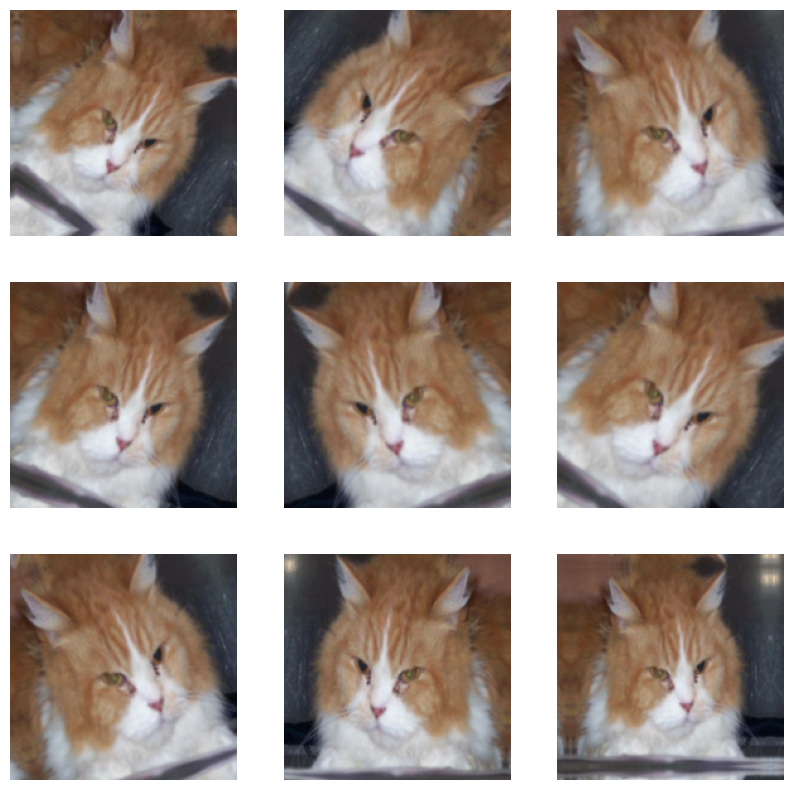

In [21]:
plt.figure(figsize=(10, 10))
for images, _ in training_data.take(1):
    for i in range(9):
        augmented_picss = augmented_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_picss[0].numpy().astype("uint8"))
        plt.axis("off")

Novel convolutional neural network with image enhancement and dropout

In [22]:
in15 = keras.Input(shape=(180, 180, 3))
mad2 = augmented_data(in15)
mad2 = layers.Rescaling(1./255)(mad2)
mad2 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(mad2)
mad2 = layers.MaxPooling2D(pool_size=2)(mad2)
mad2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(mad2)
mad2 = layers.MaxPooling2D(pool_size=2)(mad2)
mad2 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(mad2)
mad2 = layers.MaxPooling2D(pool_size=2)(mad2)
mad2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(mad2)
mad2 = layers.MaxPooling2D(pool_size=2)(mad2)
mad2 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(mad2)
mad2 = layers.Flatten()(mad2)
mad2 = layers.Dropout(0.5)(mad2)
out15 = layers.Dense(1, activation="sigmoid")(mad2)
mode15 = keras.Model(inputs=in15, outputs=out15)

mode15.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
callbac15 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmented_data.keras",
        save_best_only=True,
        monitor="val_loss")
]
history15 = mode15.fit(
    training_data,
    epochs=200,
    validation_data=valid_data,
    callbacks=callbac15)

Epoch 1/200
63/63 [==============================] - 4s 27ms/step - loss: 0.6961 - accuracy: 0.4950 - val_loss: 0.6916 - val_accuracy: 0.5310
Epoch 2/200
63/63 [==============================] - 1s 22ms/step - loss: 0.6935 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/200
63/63 [==============================] - 2s 24ms/step - loss: 0.6950 - accuracy: 0.5270 - val_loss: 0.6851 - val_accuracy: 0.5340
Epoch 4/200
63/63 [==============================] - 2s 24ms/step - loss: 0.6905 - accuracy: 0.5200 - val_loss: 0.6821 - val_accuracy: 0.5740
Epoch 5/200
63/63 [==============================] - 2s 23ms/step - loss: 0.6821 - accuracy: 0.5550 - val_loss: 0.6786 - val_accuracy: 0.5580
Epoch 6/200
63/63 [==============================] - 2s 24ms/step - loss: 0.6855 - accuracy: 0.5535 - val_loss: 0.6745 - val_accuracy: 0.5760
Epoch 7/200
63/63 [==============================] - 2s 24ms/step - loss: 0.6770 - accuracy: 0.5795 - val_loss: 0.6727 - val_accuracy: 0.5950
Epoch 

Test accuracy of the model

In [24]:
test15 = keras.models.load_model(
    "convnet_from_scratch_with_augmented_data.keras")
test_loss, test_acc = test15.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 9ms/step - loss: 0.3934 - accuracy: 0.8300
Test accuracy: 0.830


Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

Raising the training sample to 2000, keeping the Validation and test sets the same as before(500 samples)

In [25]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 2000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=667, end_index=2667)
make_subset("validation", start_index=2668, end_index=3168)
make_subset("test", start_index=3169, end_index=3669)

In [26]:
in20 = keras.Input(shape=(180, 180, 3))
mad3 = augmented_data(in20)
mad3 = layers.Rescaling(1./255)(mad3)
mad3 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(mad3)
mad3 = layers.MaxPooling2D(pool_size=2)(mad3)
mad3 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(mad3)
mad3 = layers.MaxPooling2D(pool_size=2)(mad3)
mad3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(mad3)
mad3 = layers.MaxPooling2D(pool_size=2)(mad3)
mad3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(mad3)
mad3 = layers.MaxPooling2D(pool_size=2)(mad3)
mad3 = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(mad3)
mad3 = layers.Flatten()(mad3)
mad3 = layers.Dropout(0.5)(mad3)
out20 = layers.Dense(1, activation="sigmoid")(mad3)
model20 = keras.Model(inputs=in20, outputs=out20)

model20.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [27]:
callbac20 = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_info.keras",
        save_best_only=True,
        monitor="val_loss")
]
history20 = model20.fit(
    training_data,
    epochs=300,
    validation_data=valid_data,
    callbacks=callbac20)

Epoch 1/300
63/63 [==============================] - 4s 26ms/step - loss: 0.6969 - accuracy: 0.4950 - val_loss: 0.6927 - val_accuracy: 0.5110
Epoch 2/300
63/63 [==============================] - 1s 23ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/300
63/63 [==============================] - 1s 22ms/step - loss: 0.6933 - accuracy: 0.4905 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/300
63/63 [==============================] - 1s 22ms/step - loss: 0.6933 - accuracy: 0.5015 - val_loss: 0.6928 - val_accuracy: 0.5090
Epoch 5/300
63/63 [==============================] - 2s 23ms/step - loss: 0.6939 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5060
Epoch 6/300
63/63 [==============================] - 2s 23ms/step - loss: 0.6935 - accuracy: 0.5015 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/300
63/63 [==============================] - 2s 23ms/step - loss: 0.6937 - accuracy: 0.4795 - val_loss: 0.6930 - val_accuracy: 0.5100
Epoch 

In [28]:
tes20 = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_info.keras")
test_loss, test_acc = tes20.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 9ms/step - loss: 0.4607 - accuracy: 0.8050
Test accuracy: 0.805


In [ ]:
#Q4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance.

Instantiating the VGG16 convolutional base

In [29]:
convolut_bas = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [30]:
convolut_bas.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
#Obtaining features without data augmentation by employing a pretrained model

#Getting the labels that correspond to the qualities of the VGG16

In [31]:
import numpy as np

def get_features_and_labels(dataset):
    all_feature = []
    all_label = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = convolut_bas.predict(preprocessed_images)
        all_feature.append(features)
        all_label.append(labels)
    return np.concatenate(all_feature), np.concatenate(all_label)

train_features, train_labels =  get_features_and_labels(training_data)
val_features, val_labels =  get_features_and_labels(valid_data)
test_features, test_labels =  get_features_and_labels(testing_data)

1/1 [==============================] - 0s 20ms/step


In [32]:
train_features.shape

(2000, 5, 5, 512)

In [33]:
in34 = keras.Input(shape=(5, 5, 512))
mad4 = layers.Flatten()(in34)
mad4 = layers.Dense(256)(mad4)
mad4 = layers.Dropout(0.5)(mad4)
output4 = layers.Dense(1, activation="sigmoid")(mad4)
mode4 = keras.Model(in34, output4)
mode4.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callback4 = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history4 = mode4.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callback4)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 19.3349 - accuracy: 0.9240 - val_loss: 9.0630 - val_accuracy: 0.9430
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 3.3215 - accuracy: 0.9750 - val_loss: 3.2185 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 1.7958 - accuracy: 0.9855 - val_loss: 5.1253 - val_accuracy: 0.9690
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0307 - accuracy: 0.9925 - val_loss: 2.7630 - val_accuracy: 0.9830
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.9935 - val_loss: 9.4671 - val_accuracy: 0.9610
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6023 - accuracy: 0.9960 - val_loss: 9.0274 - val_accuracy: 0.9590
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 1.2931 - accuracy: 0.9915 - val_loss: 4.7362 - val_accuracy: 0.9780
Epoch 8/20
63/63 [

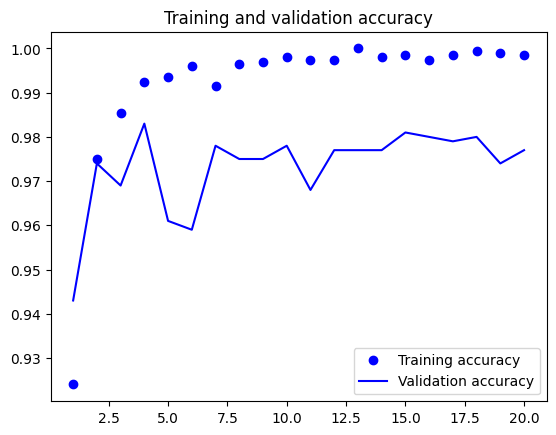

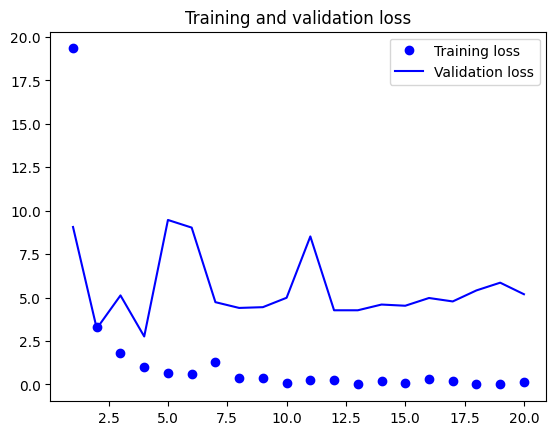

In [34]:
import matplotlib.pyplot as plt
accur = history4.history["accuracy"]
valac = history4.history["val_accuracy"]
loss = history4.history["loss"]
valloss = history4.history["val_loss"]
epochs = range(1, len(accur) + 1)
plt.plot(epochs, accur, "bo", label="Training accuracy")
plt.plot(epochs, valac, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, valloss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# VGG16 instantiation and freezing of convolutional bases

In [35]:
convolut_bas  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
convolut_bas.trainable = False

convolut_bas.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(convolut_bas.trainable_weights))

convolut_bas.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(convolut_bas.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [ ]:
# Model is now performing with a classifier and agumentation to convulation base

In [36]:
augmente_data2 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inp42 = keras.Input(shape=(180, 180, 3))
madx2 = augmente_data2(inp42)
madx2 =keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x))(madx2)
madx2 = convolut_bas(madx2)
madx2 = layers.Flatten()(madx2)
madx2 = layers.Dense(256)(madx2)
madx2 = layers.Dropout(0.5)(madx2)
outp4 = layers.Dense(1, activation="sigmoid")(madx2)
modelfin = keras.Model(inp42, outp4)
modelfin.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [37]:
callbaclast = [
    keras.callbacks.ModelCheckpoint(
        filepath="features_extraction_with_augmentation2.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

historylast = modelfin.fit(
    training_data,
    epochs=10,
    validation_data=valid_data,
    callbacks=callbaclast
)

Epoch 1/10
63/63 [==============================] - 5s 59ms/step - loss: 22.3091 - accuracy: 0.8945 - val_loss: 7.2922 - val_accuracy: 0.9560
Epoch 2/10
63/63 [==============================] - 4s 57ms/step - loss: 6.0305 - accuracy: 0.9470 - val_loss: 6.9971 - val_accuracy: 0.9550
Epoch 3/10
63/63 [==============================] - 4s 57ms/step - loss: 4.7916 - accuracy: 0.9615 - val_loss: 3.2205 - val_accuracy: 0.9780
Epoch 4/10
63/63 [==============================] - 3s 51ms/step - loss: 5.3508 - accuracy: 0.9610 - val_loss: 5.5286 - val_accuracy: 0.9680
Epoch 5/10
63/63 [==============================] - 4s 58ms/step - loss: 4.8624 - accuracy: 0.9580 - val_loss: 3.1556 - val_accuracy: 0.9780
Epoch 6/10
63/63 [==============================] - 3s 51ms/step - loss: 4.7029 - accuracy: 0.9630 - val_loss: 4.2189 - val_accuracy: 0.9770
Epoch 7/10
63/63 [==============================] - 3s 51ms/step - loss: 3.5567 - accuracy: 0.9670 - val_loss: 8.9960 - val_accuracy: 0.9600
Epoch 8/10
6

In [38]:
test_last = keras.models.load_model(
    "features_extraction_with_augmentation2.keras",safe_mode=False)
test_loss, test_acc = test_last.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 32ms/step - loss: 5.1362 - accuracy: 0.9720
Test accuracy: 0.972


Fine-tuning a pretrained model

In [ ]:
#All layers being frozen up until the fourth from the bottom

In [39]:
convolut_bas.trainable = True
for layer in convolut_bas.layers[:-4]:
    layer.trainable = False

In [40]:
modelfin.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

tuning_call = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
tuning_history = modelfin.fit(
    training_data,
    epochs=30,
    validation_data=valid_data,
    callbacks=tuning_call)

Epoch 1/30
63/63 [==============================] - 6s 65ms/step - loss: 2.0524 - accuracy: 0.9805 - val_loss: 2.5131 - val_accuracy: 0.9810
Epoch 2/30
63/63 [==============================] - 4s 62ms/step - loss: 1.3322 - accuracy: 0.9840 - val_loss: 1.9821 - val_accuracy: 0.9840
Epoch 3/30
63/63 [==============================] - 3s 55ms/step - loss: 1.3982 - accuracy: 0.9810 - val_loss: 2.9657 - val_accuracy: 0.9760
Epoch 4/30
63/63 [==============================] - 4s 62ms/step - loss: 0.7826 - accuracy: 0.9860 - val_loss: 1.4976 - val_accuracy: 0.9830
Epoch 5/30
63/63 [==============================] - 3s 54ms/step - loss: 0.8120 - accuracy: 0.9850 - val_loss: 1.6882 - val_accuracy: 0.9850
Epoch 6/30
63/63 [==============================] - 4s 55ms/step - loss: 1.2385 - accuracy: 0.9835 - val_loss: 2.2110 - val_accuracy: 0.9820
Epoch 7/30
63/63 [==============================] - 4s 63ms/step - loss: 0.7897 - accuracy: 0.9835 - val_loss: 1.3849 - val_accuracy: 0.9850
Epoch 8/30
63

In [41]:
tune_test = keras.models.load_model("fine_tuning.keras",safe_mode=False)
test_loss, test_acc = modelfin.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 31ms/step - loss: 1.7676 - accuracy: 0.9760
Test accuracy: 0.976
